# 2 章 パーセプトロン
## パーセプトロンとは
* ２つの入力信号 (x1, x2) → １つの出力(0 or 1) → ・・・・・　
* 入力信号にはそれぞれ重み (w1,w2) がつく. 　重み = 重要性
* 0 or 1の判断値を閾値 (θ) という

**重要な式**

\begin{eqnarray}
y =\left\{ \begin{array}{ll}
1 & (w_{1}x_{1}+w_{2}x_{2} \leqq \theta  ) \\
0 & (w_{1}x_{1}+w_{2}x_{2}  > \theta  ) \\
\end{array} \right.
\end{eqnarray}


## 単純な論理回路

*パラメータを変化させることで、論理回路は大きく変化する*

### ANDゲート
* ２つ入力が共に1の時だけ、1を出力. それ以外は、0を出力  
* パラメータの選び方は無限   
* etc) (w1, w2, θ) = (0.5, 0.5, 0.7), (1.0,1.0,1.0)

| x1 | x2 | y |
|:---:|:---:|:---:|
| 0 | 0 | 0 |
| 1 | 0 | 0 |
| 0 | 1 | 0 |
| 1 | 1 | 1 |

### NANDゲート
* Not ANDのこと. ANDゲートの真逆  
* ２つの入力が共に１の時、0を出力. それ以外は、1を出力  
* パラメータの選び方は無限  
* ANDを実現するパラメータの符号を全て逆転させるだけで実現できる

| x1 | x2 | y |
|:---:|:---:|:---:|
| 0 | 0 | 1 |
| 1 | 0 | 1 |
| 0 | 1 | 1 |
| 1 | 1 | 0 |

### ORゲート
* 入力信号のどちらか一つが１であれば、出力は１になる


| x1 | x2 | y |
|:---:|:---:|:---:|
| 0 | 0 | 0 |
| 1 | 0 | 1 |
| 0 | 1 | 1 |
| 1 | 1 | 1 |

### コラム
学習とは・・・・・  
> 以上のパラメータを決める作業をコンピュータにやらせる  
学習データ (以上でいう真理表)と、パーセプトロンの構造を与えて、学習させる


## パーセプトロンの実装
### 簡単な実装 (ANDゲート)

In [27]:
def AND_BASE(x1, x2):
    w1, w2, theta = 0.5, 0.5, 0.7
    tmp = x1*w1 + x2*w2
    if tmp <= theta:
        return 0
    elif tmp > theta:
        return 1

In [32]:
AND_BASE(0, 0) # 0を出力

0

In [33]:
AND_BASE(1, 0) #0を出力

0

In [34]:
AND_BASE (0, 1) # 0を出力

0

In [35]:
AND_BASE(1, 1) # 1を出力

1

### 重みとバイアスの導入
以前の式を式変形

* θ → -b 
* b: バイアス
* w1, w2: 重み

\begin{eqnarray}
y =\left\{ \begin{array}{ll}
1 & (b + w_{1}x_{1}+w_{2}x_{2} \leqq 0) \\
0 & (b + w_{1}x_{1}+w_{2}x_{2} > 0) \\
\end{array} \right.
\end{eqnarray}

この式を用いて、ANDゲートの実装を試みる  
まず、以下のテスト

In [7]:
import numpy as nu
x = nu.array([0, 1])
w = nu.array([0.5,0.5])
b = -0.7
w*x

array([ 0. ,  0.5])

In [8]:
nu.sum(w*x)

0.5

In [9]:
nu.sum(w*x)+b

-0.19999999999999996

### 重みとバイアスによる実装

In [42]:
def AND(x1, x2):
    x = nu.array([x1, x2])
    w = nu.array([0.5,0.5])
    b = -0.7
    tmp = nu.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1
    

In [47]:
def NAND(x1, x2):
    x = nu.array([x1, x2])
    w = nu.array([-0.5,-0.5])
    b = 0.7
    tmp = nu.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

In [49]:
def OR(x1, x2):
    x = nu.array([x1, x2])
    w = nu.array([0.5, 0.5])
    b= -0.2
    tmp = nu.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

## パーセプトロンの限界
### XORゲート
* 排他的論理和
* x1,x2のいずれかが１の時だけ、出力が１になる
* **線形的**に、表現することができない(以下の図を参照)
* **非線形的**に、O or 1の領域を分断することは可能

| x1 | x2 | y |
|:---:|:---:|:---:|
| 0 | 0 | 0 |
| 1 | 0 | 1 |
| 0 | 1 | 1 |
| 1 | 1 | 0 |

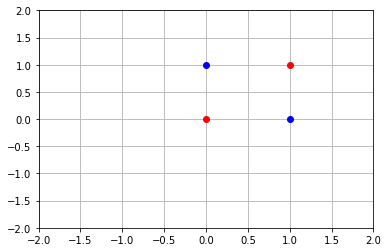

In [22]:
import matplotlib.pyplot as plt

plt.plot([0, 1], [1,0], 'bo')
plt.plot([0, 1], [0,1],  'ro')
plt.axis([-2, 2, -2, 2])

plt.grid(True)
plt.show()

今まで、扱ってきたAND, NAND, ORゲートはうまく線形的に分割できる  
以下の図がORゲートの関係を表す。４つの点うまく分離できる直線が引けることがわかる。  
直線は、(w1, w2, b) = (1.0, 1.0, -0.5)の時を引いた。
斜線部が0を出力する領域、それ以外は1を出力する領域。

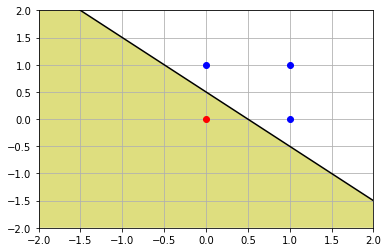

In [21]:
import matplotlib.pyplot as plt

plt.plot([0, 1, 1], [1,0,1], 'bo')
plt.plot(0, 0, 'ro')
plt.axis([-2, 2, -2, 2])

x = nu.arange(-2, 2.1, 0.1)
plt.plot(x, -x+0.5, "k")
plt.fill_between(x, -x+0.5, -2.0, facecolor='y', alpha=0.5)
plt.grid(True)
plt.show()

## 多層パーセプトロン
### 既存ゲートの組み合わせ
既存ゲートを重ね合わせて、XORゲートの再現を試みる
* ①入力をNANDとORゲートに入れる
* ②NANDとORゲートの出力をANDゲートに入れる

以下が、再現した表になる

| x1 | x2 | s1 (NAND出力)| s2 (OR出力) | y (AND出力) |
|:---:|:---:|:---:|:---:|:---:|
| 0 | 0 | 1 | 0 | 0 |
| 1 | 0 | 1 | 1 | 1 | 
| 0 | 1 | 1 | 1 | 1 |
| 1 | 1 | 0 | 1 | 0 |

### 実際の実装

In [50]:
def XOR(x1, x2):
    s1 = NAND(x1, x2)
    s2 = OR(x1, x2)
    y = AND(s1, s2)
    return y

In [51]:
XOR(0,0)

0

In [52]:
XOR(1,0)

1

In [53]:
XOR(0,1)

1

In [54]:
XOR(1,1)

0

### 組み合わせによる展望
* 重みをもつ層を数えて、以上のXORゲートは2層のパーセプトロンという
* パーセプトロンは、層を重なることでより柔軟な表現が可能に
* コンピューター => NANDゲートの組み合わせのみで表現できる => パーセプトロンのみでコンピューターを表現できる！
* 多層パーセプトロンは、マクロに見れば単一のパーセプトロンとしても見れる

# まとめ
* パーセプトロンは入出力を備えたアルゴリズムである。ある入力を与えた ら、決まった値が出力される。
* **パーセプトロンでは、「重み」と「バイアス」をパラメータとして設定する**。
* パーセプトロンを用いれば、パラメータを変えることで、AND や OR ゲートなどの論理回路を表現できる。
*  単層のパーセプトロンは線形領域だけしか表現できないのに対して、**多層のパーセプトロンは非線形領域を表現することができる**。  
   ----- 多層パーセプトロンは任意の関数を表現可能
* 多層のパーセプトロンは、(理論上)コンピュータを表現できる。